In [ ]:
import numpy as np
import cv2 as cv

In [ ]:
path_to_data = '/home/neuronas/Videos for Course Project/'

In [ ]:
path_to_data = 'C:/Users/Human/Documents/Adobe/Premiere Pro/22.0/'

In [ ]:
frames = np.zeros((54354,270,480,3), dtype='u1')
labels = []

In [ ]:
cap1 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_1.mp4')
cap2 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_2.mp4')
cap3 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_3.mp4')
cap4 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_4.mp4')
cap5 = cv.VideoCapture(path_to_data+'2019-11-26 20-18-01_5.mp4')
while cap1.isOpened():
    ret1, frame1 = cap1.read()
    _, frame2 = cap2.read()
    _, frame3 = cap3.read()
    _, frame4 = cap4.read()
    _, frame5 = cap5.read()
    if not ret1:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    max_frame_1 = (np.max(frame1) > 5) * 1
    max_frame_2 = (np.max(frame2) > 5) * 2
    max_frame_3 = (np.max(frame3) > 5) * 3
    max_frame_4 = (np.max(frame4) > 5) * 4
    max_frame_5 = (np.max(frame5) > 5) * 5
    # print(frame1)
    # break
    # frames.append(frame1+frame2+frame3+frame4+frame5)
    frames[len(labels)] = cv.resize([frame1,frame2,frame3,frame4,frame5][max(max_frame_1,max_frame_2,max_frame_3,max_frame_4,max_frame_5)-1], (480,270))
    if (len(labels) % 1000 == 0):
      print(len(labels))
    labels.append(max(max_frame_1,max_frame_2,max_frame_3,max_frame_4,max_frame_5))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
Can't receive frame (stream end?). Exiting ...


In [ ]:
len(labels)

54354

In [ ]:
np.max(labels)

5

In [ ]:
np.save('frames.npy',frames)

NameError: name 'np' is not defined

In [ ]:
np.save('lables.npy',labels)

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers, losses
import matplotlib.pyplot as plt

In [ ]:
frames = np.load('frames.npy', mmap_mode='c')
labels = np.load('lables.npy', mmap_mode='c')

In [ ]:
frames_number = 5
batch_size = 48

In [ ]:
def set_frame_classifier():
  model = models.Sequential([
    layers.Conv2D(80, 3, padding='same', activation='tanh', input_shape=(270, 480, 3*frames_number)),
    layers.MaxPooling2D(),
    layers.Conv2D(80, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(160, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(160, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(320, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(320, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1024, activation='sigmoid'),
    layers.Dense(5, activation='softmax')
  ])
  return model

In [ ]:
model = set_frame_classifier()

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 270, 480, 80)      10880     
                                                                 
 max_pooling2d_108 (MaxPooli  (None, 135, 240, 80)     0         
 ng2D)                                                           
                                                                 
 conv2d_109 (Conv2D)         (None, 135, 240, 80)      57680     
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 67, 120, 80)      0         
 ng2D)                                                           
                                                                 
 conv2d_110 (Conv2D)         (None, 67, 120, 160)      115360    
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 33, 60, 160)    

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
X_size = len(frames)
X_size

54354

In [ ]:
import gc

In [ ]:
!sensors

"sensors" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
gc.collect()

2527

In [ ]:
# for i in range((X_size // 10)-2):
for e in range(10):
  X = []
  index = np.random.randint(0, X_size-frames_number, batch_size)
  for j in range(batch_size):
    X.append(np.array(frames[index[j]:(index[j]+frames_number)].transpose(1, 2, 0, 3).reshape(270, 480, -1)))
  X = np.array(X) / 255.
  y = tf.one_hot((labels[index+frames_number-1]-1).reshape(batch_size,), depth=5)
  model.fit(X, y, epochs=5)
  gc.collect()

Epoch 1/5
2/2 [==============================] - 1s 182ms/step - loss: 0.5890 - accuracy: 0.7917
Epoch 2/5
2/2 [==============================] - 1s 193ms/step - loss: 0.4901 - accuracy: 0.8125
Epoch 3/5
2/2 [==============================] - 1s 188ms/step - loss: 0.5278 - accuracy: 0.8542
Epoch 4/5
2/2 [==============================] - 1s 173ms/step - loss: 0.4175 - accuracy: 0.8542
Epoch 5/5
2/2 [==============================] - 1s 201ms/step - loss: 0.3658 - accuracy: 0.8542
Epoch 1/5
2/2 [==============================] - 1s 201ms/step - loss: 0.7934 - accuracy: 0.8333
Epoch 2/5
2/2 [==============================] - 1s 180ms/step - loss: 0.6595 - accuracy: 0.8542
Epoch 3/5
2/2 [==============================] - 1s 177ms/step - loss: 0.4814 - accuracy: 0.8542
Epoch 4/5
2/2 [==============================] - 1s 208ms/step - loss: 0.3997 - accuracy: 0.8958
Epoch 5/5
2/2 [==============================] - 1s 206ms/step - loss: 0.3220 - accuracy: 0.9167
Epoch 1/5
2/2 [===============

In [ ]:
np.argmax(model.predict(X),axis=1)

2/2 [==============================] - 0s 93ms/step


array([1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1,
       0, 3, 1, 3, 1, 1, 0, 0, 4, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1], dtype=int64)

In [ ]:
np.argmax(y,axis=1)

array([1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 4, 0, 1, 3, 1, 1, 1, 1,
       0, 3, 1, 3, 1, 1, 0, 0, 4, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1], dtype=int64)

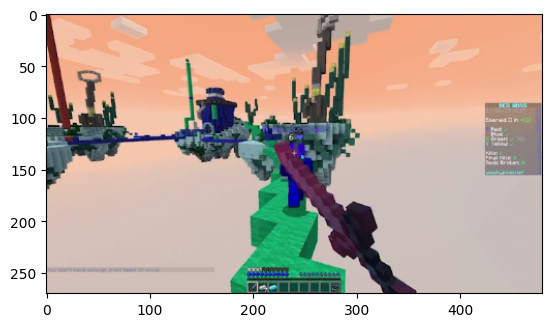

In [ ]:
plt.imshow(X[25][:,:,0:3])

In [ ]:
gc.collect()

3061

In [ ]:
import os

base_path = 'D:\\NN_answers'

matrix = [[0 for i in range(5)] for i in range(5)]

temp_batch_size = 512

for index in range(X_size//temp_batch_size//3,2*X_size//temp_batch_size//3):
  X = []
  y = []
  for j in range(temp_batch_size):
    X.append(np.array(frames[index*temp_batch_size+j:(index*temp_batch_size+j+frames_number)].transpose(1, 2, 0, 3).reshape(270, 480, -1)))
    y.append(labels[index*temp_batch_size+j+frames_number]-1)
  X = np.array(X) / 255.
  y = np.array(y)
  pred = np.argmax(model.predict(X),axis=1)
  for p,t in zip(pred, y):
    matrix[t][p] += 1
  gc.collect()
  print(matrix)

16/16 [==============================] - 2s 104ms/step
[[0, 0, 0, 0, 0], [0, 505, 0, 7, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
16/16 [==============================] - 2s 95ms/step
[[0, 0, 0, 0, 0], [7, 922, 0, 10, 11], [0, 0, 0, 0, 0], [10, 23, 0, 38, 3], [0, 0, 0, 0, 0]]
16/16 [==============================] - 2s 97ms/step
[[0, 0, 0, 0, 0], [33, 1243, 4, 22, 160], [0, 0, 0, 0, 0], [10, 23, 0, 38, 3], [0, 0, 0, 0, 0]]
16/16 [==============================] - 2s 99ms/step
[[0, 0, 0, 0, 0], [33, 1641, 4, 60, 236], [0, 0, 0, 0, 0], [10, 23, 0, 38, 3], [0, 0, 0, 0, 0]]
16/16 [==============================] - 2s 96ms/step
[[0, 0, 0, 0, 0], [33, 2146, 11, 60, 236], [0, 0, 0, 0, 0], [10, 23, 0, 38, 3], [0, 0, 0, 0, 0]]
16/16 [==============================] - 2s 96ms/step
[[0, 0, 0, 0, 0], [35, 2612, 11, 73, 267], [0, 0, 0, 0, 0], [10, 23, 0, 38, 3], [0, 0, 0, 0, 0]]
16/16 [==============================] - 2s 97ms/step
[[0, 0, 0, 0, 0], [50, 2998, 11, 104, 281], [0, 0, 0, 

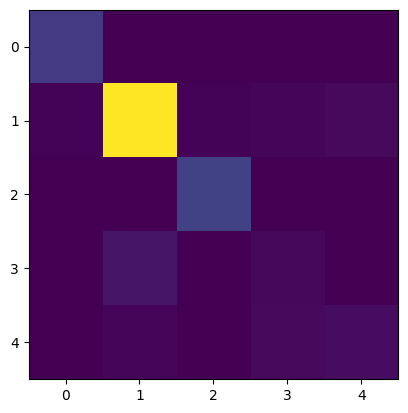

In [ ]:
plt.imshow(matrix)

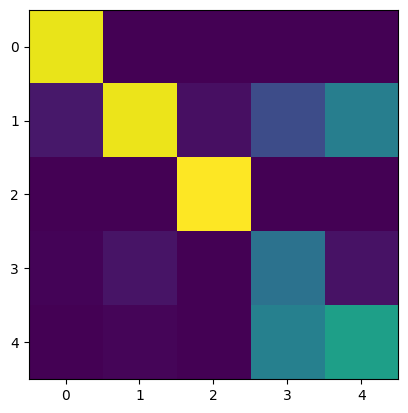

In [ ]:
plt.imshow(np.array(matrix)/np.sum(np.array(matrix),axis=0))

16/16 [==============================] - 2s 97ms/step
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

KeyboardInterrupt: 

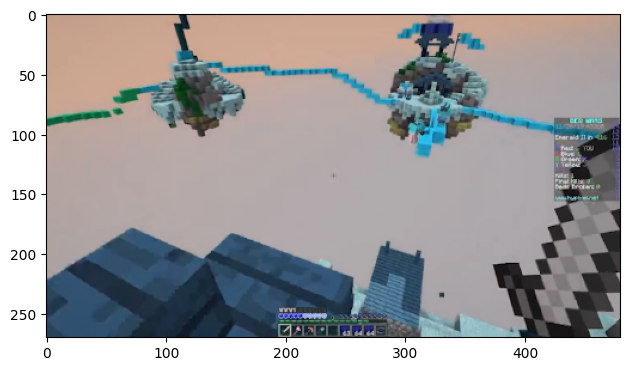

In [ ]:
import os

base_path = 'D:\\NN_answers'

temp_batch_size = 512

for index in range(X_size//temp_batch_size//3,X_size//temp_batch_size):
  X = []
  y = []
  for j in range(temp_batch_size):
    X.append(np.array(frames[index*temp_batch_size+j:(index*temp_batch_size+j+frames_number)].transpose(1, 2, 0, 3).reshape(270, 480, -1)))
  X = np.array(X) / 255.
  pred = np.argmax(model.predict(X),axis=1)
  print(pred)

  for j in range(temp_batch_size//16):
    batch_index = j*16
    destination_path = os.path.join(base_path, str(pred[batch_index]))
    os.makedirs(destination_path, exist_ok=True)
    title = str(index*temp_batch_size+batch_index)+'.jpg'
    destination_file_path = os.path.join(destination_path, title)

    plt.tight_layout()
    plt.imshow(X[batch_index][:,:,3*frames_number-3:3*frames_number])
    plt.savefig(destination_file_path)
  gc.collect()